<a href="https://colab.research.google.com/github/My-Hang/AI/blob/main/B%C3%80I_T%E1%BA%ACP_GI%E1%BB%AEA_K%C3%8C_(FLOWERS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
folder = '/content/drive/MyDrive/HOA'

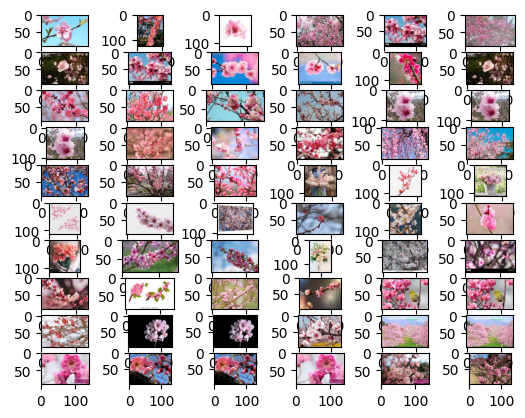

In [ ]:
for i in range(60):
  plt.subplot(10,6,i+1)
  filename=folder+'/Apri ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

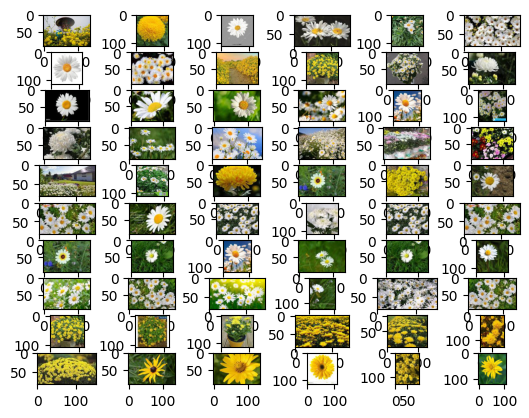

In [ ]:
for i in range(60):
  plt.subplot(10,6,i+1)
  filename=folder+'/Daisy ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

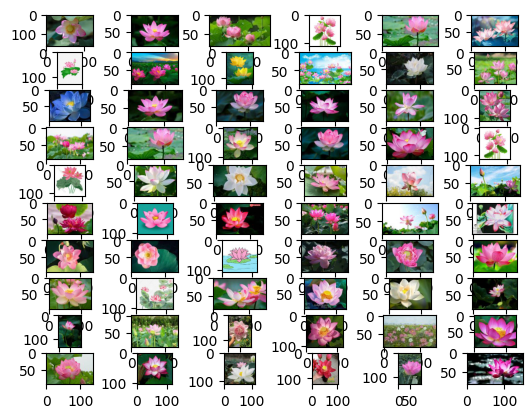

In [ ]:
for i in range(60):
  plt.subplot(10,6,i+1)
  filename=folder+'/Lotus ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

In [ ]:
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/HOA/'
photos, labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Apri'):
    output = 1
  if file.startswith('Daisy'):
    output = 2
  if file.startswith('Lotus'):
    output = 3
  img =load_img(folder+ file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('hoa_photos.npy',photos)
save('hoa_labels.npy',labels)

(183, 30, 40, 3) (183,)


In [ ]:
import numpy as np
x_train = np.load('/content/hoa_photos.npy')
y_train = np.load('/content/hoa_labels.npy')
print(x_train.shape)
print(y_train.shape)

(183, 30, 40, 3)
(183,)


In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,100)
model = Sequential()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lần tích chập
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lần tích chập
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lần tích chập
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=64,epochs = 100,verbose = 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 10, 64)        

1/1 [==============================] - 0s 229ms/step


'Lotus'

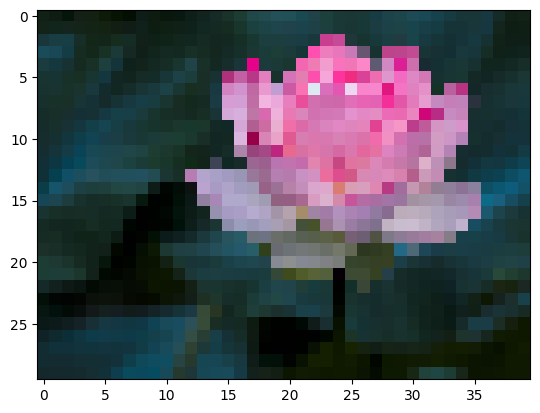

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1: 'Apri',2:'Daisy', 3:'Lotus'}
img = load_img("/content/lotus-flower-828457262-5c6334b646e0fb0001dcd75a.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]